<a href="https://colab.research.google.com/github/Hellork780/World-Population-Data-Analysis/blob/main/Population_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Data Prepration

Upload Data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving world_population.csv to world_population.csv
User uploaded file "world_population.csv" with length 29249 bytes


## Inspect the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv(fn)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

## Data Cleaning

In [ ]:
print(df.isnull().sum())  # Count missing values per column


Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [ ]:
# Rename columns to be more consistent and easier to work with
df = df.rename(columns={
    'Country/Territory': 'Country',
    '2022 Population': 'Population2022',
    '2020 Population': 'Population2020',
    '2015 Population': 'Population2015',
    '2010 Population': 'Population2010',
    '2000 Population': 'Population2000',
    '1990 Population': 'Population1990',
    '1980 Population': 'Population1980',
    '1970 Population': 'Population1970',
    'Area (km²)': 'Area',
    'Density (per km²)': 'Density',
    'Growth Rate': 'GrowthRate',
    'World Population Percentage': 'WorldPopulationPercentage'
})

# Remove rows with missing values. (Optional, based on your needs)
df = df.dropna()
# Check for duplicates and remove if needed
df = df.drop_duplicates()
# Print the cleaned dataframe
df.head(10)


,Rank,CCA3,Country,Capital,Continent,Population2022,Population2020,Population2015,Population2010,Population2000,Population1990,Population1980,Population1970,Area,Density,GrowthRate,WorldPopulationPercentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


Check Outliers

In [ ]:
import numpy as np

def detect_outliers_iqr(data):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: A pandas Series or NumPy array containing the data.

  Returns:
    A list of indices of the outliers.
  """
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]

  return outliers

# Example usage:
# Detect outliers in the 'Population2022' column
outliers_population = detect_outliers_iqr(df['Population2022'])
print("Outliers in Population2022:", outliers_population)


# Detect outliers in the 'Area' column
outliers_area = detect_outliers_iqr(df['Area'])
print("Outliers in Area:", outliers_area)




Outliers in Population2022: [171186372, 215313498, 1425887337, 99010212, 110990103, 123379924, 64626628, 83369843, 1417173173, 275501339, 88550570, 59037474, 123951692, 127504125, 218541212, 235824862, 115559009, 144713314, 59893885, 65497748, 71697030, 85341241, 67508936, 338289857, 98186856]
Outliers in Area: [2381741, 1246700, 2780400, 7692024, 1098581, 8515767, 9984670, 1284000, 9706961, 1141748, 2344858, 1104300, 2166086, 3287590, 1904569, 1648195, 2724900, 1759540, 1240192, 1964375, 1564110, 1267000, 1285216, 17098242, 2149690, 1221037, 1886068, 9372610]


# 2.Feature Engineering
Create new columns for deeper insights:

Calculate Population Growth Rate Over the Decades

In [ ]:
# Calculate population growth rate between decades
df['GrowthRate2022_2020'] = ((df['Population2022'] - df['Population2020']) / df['Population2020']) * 100
df['GrowthRate2020_2015'] = ((df['Population2020'] - df['Population2015']) / df['Population2015']) * 100
df['GrowthRate2015_2010'] = ((df['Population2015'] - df['Population2010']) / df['Population2010']) * 100
df['GrowthRate2010_2000'] = ((df['Population2010'] - df['Population2000']) / df['Population2000']) * 100
df['GrowthRate2000_1990'] = ((df['Population2000'] - df['Population1990']) / df['Population1990']) * 100
df['GrowthRate1990_1980'] = ((df['Population1990'] - df['Population1980']) / df['Population1980']) * 100
df['GrowthRate1980_1970'] = ((df['Population1980'] - df['Population1970']) / df['Population1970']) * 100

# Display the updated DataFrame with growth rates
df.head()

,Rank,CCA3,Country,Capital,Continent,Population2022,Population2020,Population2015,Population2010,Population2000,...,Density,GrowthRate,WorldPopulationPercentage,GrowthRate2022_2020,GrowthRate2020_2015,GrowthRate2015_2010,GrowthRate2010_2000,GrowthRate2000_1990,GrowthRate1990_1980,GrowthRate1980_1970
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,63.0587,1.0257,0.52,5.533532,15.461304,19.737112,44.244476,82.733565,-14.350028,16.122614
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,98.8702,0.9957,0.04,-0.855573,-0.542311,-1.061235,-8.441868,-3.430736,12.014172,26.537264
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,18.8531,1.0164,0.56,3.340629,9.884169,10.282169,16.512707,20.599309,36.173538,35.832803
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,222.4774,0.9831,0.00,-4.148174,-10.082152,-6.346515,-5.806285,21.774227,45.405340,21.462604
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,170.5641,1.0100,0.00,2.733591,8.298720,0.317398,8.203095,23.386660,50.428238,79.310171


Find Population Change Over the Last 50 Years



In [ ]:
# Calculate the population change from 1970 to 2022
df['PopulationChange50Years'] = df['Population2022'] - df['Population1970']

# Calculate the percentage change in population over the last 50 years
df['PercentageChange50Years'] = ((df['Population2022'] - df['Population1970']) / df['Population1970']) * 100

# Display the DataFrame with the population change and percentage change columns
df[['Country', 'Population1970', 'Population2022', 'PopulationChange50Years', 'PercentageChange50Years']].head(10)

,Country,Population1970,Population2022,PopulationChange50Years,PercentageChange50Years
0,Afghanistan,10752971,41128771,30375800,282.487510
1,Albania,2324731,2842321,517590,22.264511
2,Algeria,13795915,44903225,31107310,225.482036
3,American Samoa,27075,44273,17198,63.519852
4,Andorra,19860,79824,59964,301.933535
5,Angola,6029700,35588987,29559287,490.228154
6,Anguilla,6283,15857,9574,152.379437
7,Antigua and Barbuda,64516,93763,29247,45.332941
8,Argentina,23842803,45510318,21667515,90.876542
9,Armenia,2534377,2780469,246092,9.710158


Calculate Population Density Change

In [ ]:
# Calculate Population Density Change over time
df['DensityChange2022_2020'] = df['Density'] - (df['Population2020'] / df['Area'])
df['DensityChange2020_2015'] = (df['Population2020'] / df['Area']) - (df['Population2015'] / df['Area'])
df['DensityChange2015_2010'] = (df['Population2015'] / df['Area']) - (df['Population2010'] / df['Area'])
df['DensityChange2010_2000'] = (df['Population2010'] / df['Area']) - (df['Population2000'] / df['Area'])

# Display the DataFrame with the density change columns
df[['Country', 'Density', 'DensityChange2022_2020', 'DensityChange2020_2015', 'DensityChange2015_2010', 'DensityChange2010_2000']].head(10)


,Country,Density,DensityChange2022_2020,DensityChange2020_2015,DensityChange2015_2010,DensityChange2010_2000
0,Afghanistan,63.0587,3.306419,8.001366,8.530468,13.257118
1,Albania,98.8702,-0.853224,-0.543760,-1.075484,-9.344024
2,Algeria,18.8531,0.609443,1.641031,1.547947,2.133617
3,American Samoa,222.4774,-9.628128,-26.025126,-17.492462,-16.989950
4,Andorra,170.5641,4.538459,12.722222,0.485043,11.585470
5,Angola,28.5466,1.733024,4.251836,3.820916,5.590858
6,Anguilla,174.2527,2.988964,11.648352,14.868132,23.351648
7,Antigua and Barbuda,212.1335,2.486441,6.160633,9.606335,24.072398
8,Argentina,16.3683,0.170619,0.639824,0.775767,1.449198
9,Armenia,93.4831,-0.845246,-2.453922,-2.276099,-7.471674


# 3.Exploratory Data Analysis (EDA)

 Summary Statistics

In [ ]:
print(df.describe())  # Summary statistics


             Rank  Population2022  Population2020  Population2015  \
count  234.000000    2.340000e+02    2.340000e+02    2.340000e+02   
mean   117.500000    3.407441e+07    3.350107e+07    3.172996e+07   
std     67.694165    1.367664e+08    1.355899e+08    1.304050e+08   
min      1.000000    5.100000e+02    5.200000e+02    5.640000e+02   
25%     59.250000    4.197385e+05    4.152845e+05    4.046760e+05   
50%    117.500000    5.559944e+06    5.493074e+06    5.307400e+06   
75%    175.750000    2.247650e+07    2.144798e+07    1.973085e+07   
max    234.000000    1.425887e+09    1.424930e+09    1.393715e+09   

       Population2010  Population2000  Population1990  Population1980  \
count    2.340000e+02    2.340000e+02    2.340000e+02    2.340000e+02   
mean     2.984524e+07    2.626947e+07    2.271022e+07    1.898462e+07   
std      1.242185e+08    1.116982e+08    9.783217e+07    8.178519e+07   
min      5.960000e+02    6.510000e+02    7.000000e+02    7.330000e+02   
25%      3.93

Find Top & Bottom Countries by Population

In [ ]:
# Find the top 10 most populated countries
top_10_populated = df.sort_values('Population2022', ascending=False).head(10)
print("Top 10 Most Populated Countries:")
print(top_10_populated[['Country', 'Population2022']])

Top 10 Most Populated Countries:
           Country  Population2022
41           China      1425887337
92           India      1417173173
221  United States       338289857
93       Indonesia       275501339
156       Pakistan       235824862
149        Nigeria       218541212
27          Brazil       215313498
16      Bangladesh       171186372
171         Russia       144713314
131         Mexico       127504125


In [ ]:
# Find the bottom 10 least populated countries
bottom_10_populated = df.sort_values('Population2022', ascending=True).head(10)
print("\nBottom 10 Least Populated Countries:")
print(bottom_10_populated[['Country', 'Population2022']])



Bottom 10 Least Populated Countries:
                       Country  Population2022
226               Vatican City             510
209                    Tokelau            1871
150                       Niue            1934
64            Falkland Islands            3780
137                 Montserrat            4390
177  Saint Pierre and Miquelon            5862
173           Saint Barthelemy           10967
216                     Tuvalu           11312
229          Wallis and Futuna           11572
142                      Nauru           12668



### Detect Outliers



In [ ]:
# Detect outliers in the 'Density' column
outliers_density = detect_outliers_iqr(df['Density'])
print("Outliers in Density:", outliers_density)

Outliers in Density: [591.3611, 1924.4876, 1160.035, 654.9651, 1188.5926, 5441.5, 811.5513, 6783.3922, 954.9828, 23172.2667, 1745.9567, 1687.6139, 636.9946, 871.9278, 18234.5, 603.2381, 844.063, 599.8302, 551.8033, 8416.4634, 1299.2647, 660.1662]


Detect Outliers (Population & Area)

In [ ]:
import numpy as np

def detect_outliers_iqr(data):
  """
  Detects outliers using the Interquartile Range (IQR) method.

  Args:
    data: A pandas Series or NumPy array containing the data.

  Returns:
    A list of indices of the outliers.
  """
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]

  return outliers

# Example usage:
# Detect outliers in the 'Population2022' column
outliers_population = detect_outliers_iqr(df['Population2022'])
print("Outliers in Population2022:", outliers_population)


# Detect outliers in the 'Area' column
outliers_area = detect_outliers_iqr(df['Area'])
print("Outliers in Area:", outliers_area)



Outliers in Population2022: [171186372, 215313498, 1425887337, 99010212, 110990103, 123379924, 64626628, 83369843, 1417173173, 275501339, 88550570, 59037474, 123951692, 127504125, 218541212, 235824862, 115559009, 144713314, 59893885, 65497748, 71697030, 85341241, 67508936, 338289857, 98186856]
Outliers in Area: [2381741, 1246700, 2780400, 7692024, 1098581, 8515767, 9984670, 1284000, 9706961, 1141748, 2344858, 1104300, 2166086, 3287590, 1904569, 1648195, 2724900, 1759540, 1240192, 1964375, 1564110, 1267000, 1285216, 17098242, 2149690, 1221037, 1886068, 9372610]


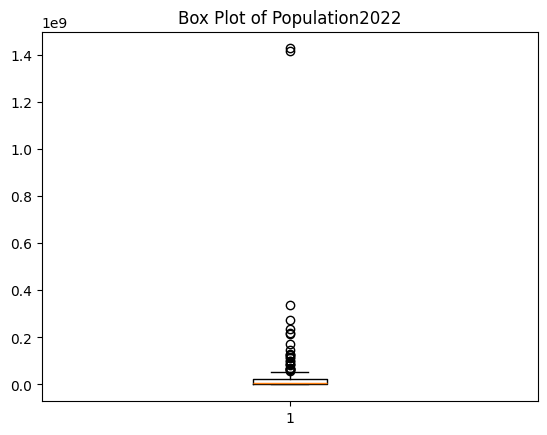

In [ ]:
# Create a box plot for Population2022:
import matplotlib.pyplot as plt
plt.boxplot(df['Population2022'])
plt.title('Box Plot of Population2022')
plt.show()

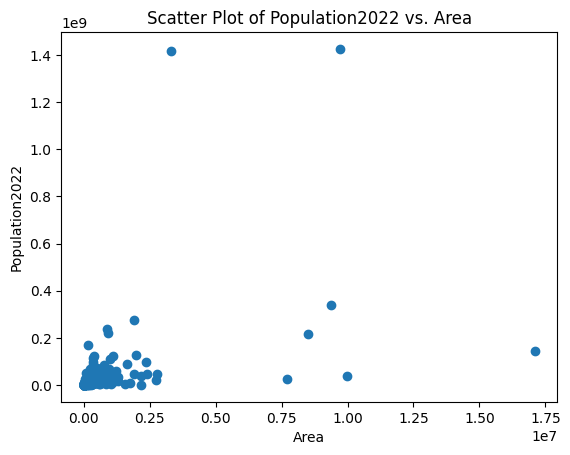

In [ ]:
# To create a scatter plot for Population2022 vs. Area:
plt.scatter(df['Area'], df['Population2022'])
plt.xlabel('Area')
plt.ylabel('Population2022')
plt.title('Scatter Plot of Population2022 vs. Area')
plt.show()

# 4.Data Visualization

Population Distribution Across Continents



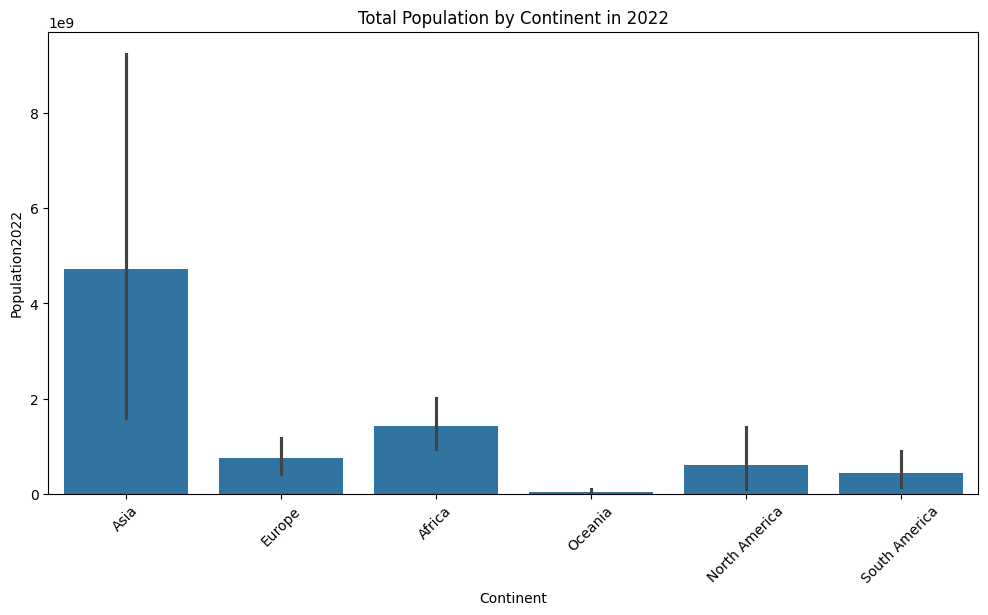

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=df["Continent"], y=df["Population2022"], estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Population by Continent in 2022")
plt.show()


Population Growth Over Time

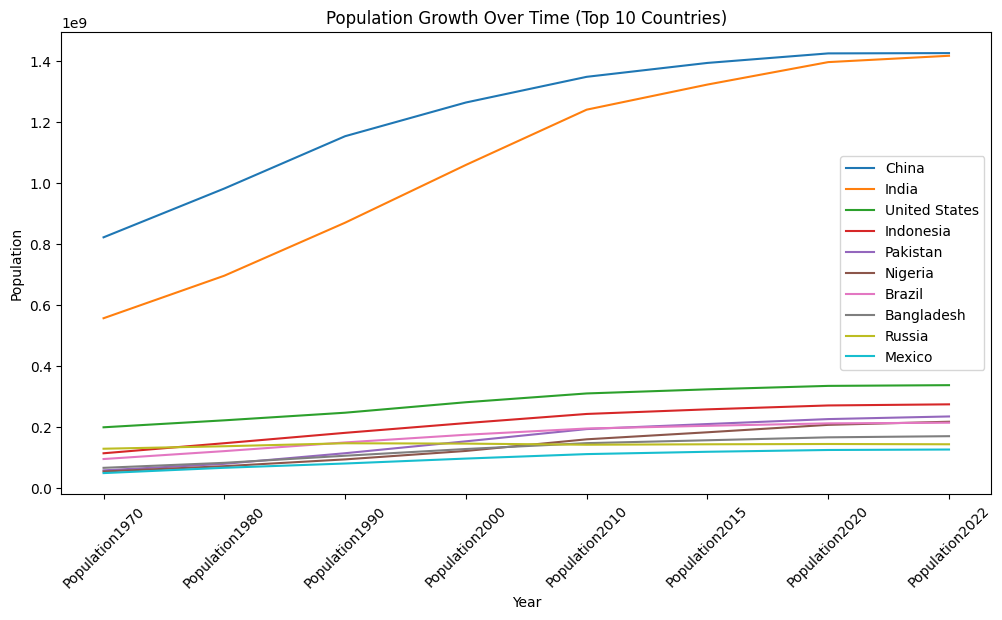

In [ ]:
# Select the top 10 countries by population in 2022
top_10_countries = df.nlargest(10, 'Population2022')

# Create a new figure and axes
plt.figure(figsize=(12, 6))

# Iterate through the top 10 countries and plot their population growth
for country in top_10_countries['Country']:
  country_data = df[df['Country'] == country]
  years = ['Population1970', 'Population1980', 'Population1990', 'Population2000', 'Population2010', 'Population2015', 'Population2020', 'Population2022']
  population_values = [country_data[year].values[0] for year in years]
  plt.plot(years, population_values, label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time (Top 10 Countries)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

Top 10 Most Densely Populated Countries

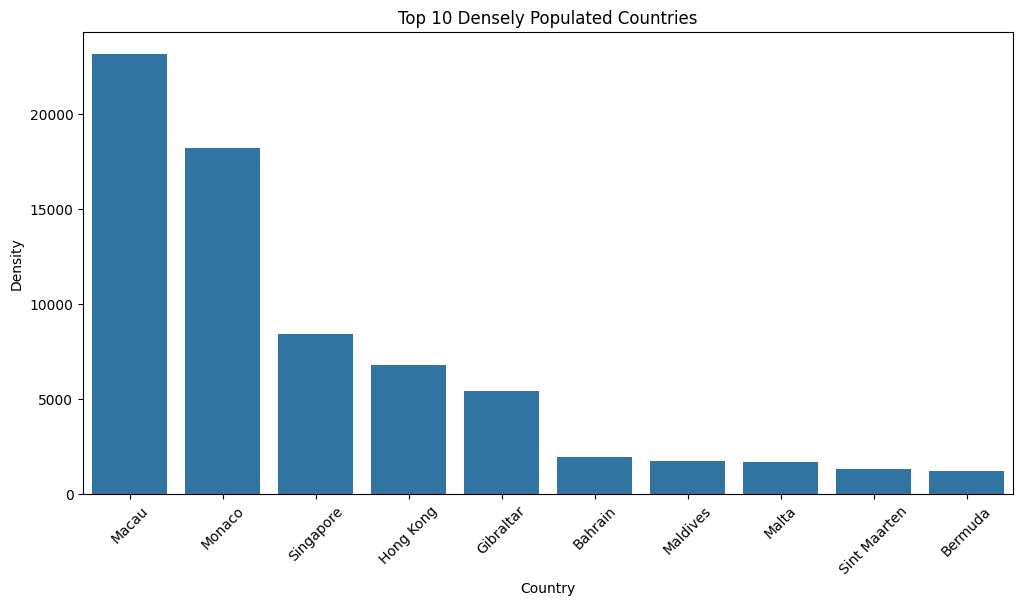

In [ ]:
top_dense = df.nlargest(10, "Density")
plt.figure(figsize=(12,6))
sns.barplot(x=top_dense["Country"], y=top_dense["Density"])
plt.xticks(rotation=45)
plt.title("Top 10 Densely Populated Countries")
plt.show()


# Insights & Conclusion
🔹 Most populated countries: China, India, USA, Indonesia.

🔹 Fastest-growing regions: Africa has a high growth rate.

🔹 Lowest density countries: Greenland, Mongolia.

🔹 Highest density: Monaco, Macau.

Predict Future Population of Top 10 countries (Regression Model)

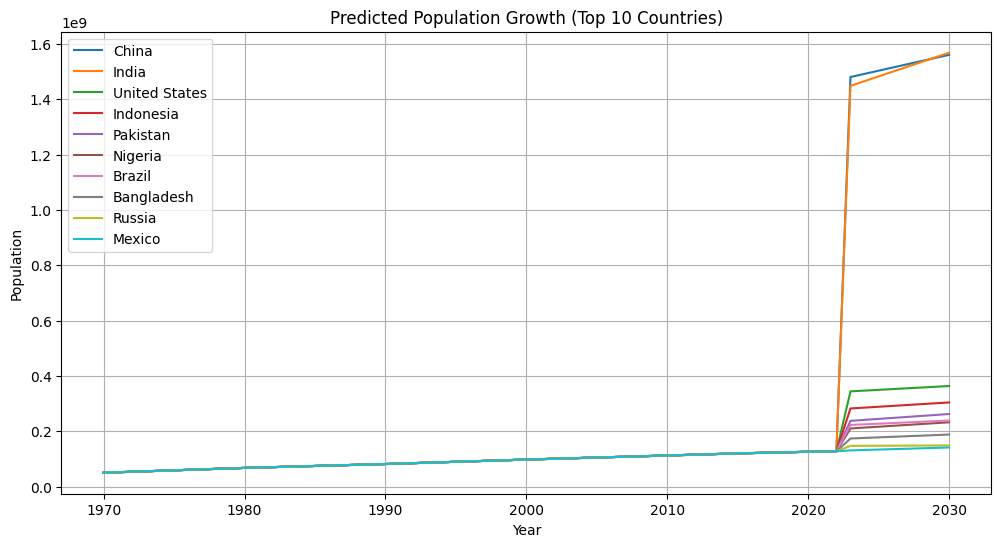

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the top 10 countries for prediction
top_10_countries = df.nlargest(10, 'Population2022')

# Prepare data for regression
X = np.array([1970, 1980, 1990, 2000, 2010, 2015, 2020, 2022]).reshape(-1, 1)
future_years = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)

# Create a dictionary to store predicted population values
predicted_population = {}

# Loop through top 10 countries
for country in top_10_countries['Country']:
  country_data = df[df['Country'] == country]
  years = ['Population1970', 'Population1980', 'Population1990', 'Population2000', 'Population2010', 'Population2015', 'Population2020', 'Population2022']
  population_values = [country_data[year].values[0] for year in years]
  y = np.array(population_values).reshape(-1, 1)

  # Train the linear regression model
  model = LinearRegression()
  model.fit(X, y)

  # Predict future population
  future_population = model.predict(future_years)

  # Store the predicted population values for each country
  predicted_population[country] = future_population.flatten().tolist()

# Plot the predictions
plt.figure(figsize=(12, 6))
for country, population in predicted_population.items():
  plt.plot(np.concatenate((X.flatten(), future_years.flatten())), np.concatenate((y.flatten(), population)), label=country)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Growth (Top 10 Countries)')
plt.legend()
plt.grid(True)
plt.show()


Top 10 most populated Countries

In [ ]:

import plotly.express as px

# Assuming 'df' is your DataFrame containing country population data.

# Get the top 10 most populated countries
top_10_countries = df.nlargest(10, 'Population2022')

# Create a world map using Plotly Express
fig = px.choropleth(
    top_10_countries,
    locations="Country",
    locationmode="country names",
    color="Population2022",
    hover_name="Country",
    title="Top 10 Most Populated Countries",
    color_continuous_scale=px.colors.sequential.Plasma
)

# Show the map
fig.show()
